### Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

### Read the dataset

In [3]:
inp0=pd.read_csv("bank_marketing_updated_v1.csv")
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


The first two rows in the raw file are not to be used and they need to be skipped.

### Data Cleaning

In [4]:
inp0=pd.read_csv("bank_marketing_updated_v1.csv",skiprows=2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


customerid is not adding any value to our analysis so we will be dropping it.

In [5]:
inp0.drop("customerid",axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


Let's look at the jobedu column, and we will be dividing jobedu into job and edu.

In [6]:
inp0["job"]=inp0.jobedu.apply(lambda x:x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [7]:
inp0["edu"]=inp0.jobedu.apply(lambda x:x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


We need to drop the jobedu column now.

In [8]:
inp0.drop("jobedu",axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


We see the month column has both the month and the year and also the data is from 2017.
We want to extract month from the column month.

In [9]:
inp0["month"]=inp0.month.apply(lambda x:x.split(",")[0])

AttributeError: 'float' object has no attribute 'split'

Let's whats going on?

Checking the type of values in month column whether they are float or not?

In [10]:
inp0[inp0.month.apply(lambda x: isinstance(x,float))==True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


We can see above that there are some values NaN, which means this column has missing values and therefore it is trating these as float.

#### Let's check for the missing values.

In [11]:
inp0.isnull().sum()

age         20
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
edu          0
dtype: int64

### Handling Missing Values

In [12]:
inp0.age.isnull().sum()

20

In [13]:
inp0.shape

(45211, 19)

In [14]:
#percentage of missing records for age
100*20/45211

0.04423702196368141

That's roughly .04 percent. It is very smaller number.
We can take a call here, for our task we could do with dropping these records with age missing

In [15]:
inp1=inp0[~inp0["age"].isnull()].copy()
inp1.shape

(45191, 19)

In [16]:
inp1.age.isnull().sum()

0

Let's look at the other columns.

#### Handling missing values for months

In [17]:
inp1.month.isnull().sum()

50

Again the value is less, but in this case we will adapt a different strategy and we will substitute a different value in place of missing values.

In [18]:
#Let's look at the percentage of values
inp1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

Roughly 30 percent values are in may, so we can take a call and we can assign the missing values to may.

We will estimate the missing values to May.

We could have used a predictive model for it but this is the most basic EDA.

In [19]:
inp1.month.mode()

0    may, 2017
dtype: object

In [20]:
month_mode=inp1.month.mode()[0]
month_mode

'may, 2017'

Let's replace the missing values with the may 2017.

We will use the fillna() method.

In [21]:
inp1.month.fillna(month_mode,inplace=True)
inp1.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [22]:
inp1.month.isnull().sum()

0

So we followed two strategies here:
1. We dropped the rows
2. We replaced the missing values with the most frequent ones

Let's look at the pdays variable:

In [23]:
inp1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

pdays= days since previous campaign

We notice that atleast 75% values are -1.

Why do we have so many -1 ?

So -1 is just an encoding that these people were not contacted earlier, they were not a part of earlier campaign.
Therefore -1 indicates missing values!!. -1 is an indicator of missing values.

#### pdays also has missing values and how do we handle this?

- What was our objective?
-- Our objective was to determine the factors to promote the campaign.

- We want the missing values to be ignored in the calculation.
- How do we do that ?
- simply make it missing or replace -1 with NaN
- So all the summary statistics will ignore the missing values.

In [24]:
inp1.loc[inp1.pdays<0,"pdays"]=np.NaN
inp1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Now you see the things have changed completely!

We have few take aways here and they are important ones.
- Missing values doesnt always have to be null.

##### Now we have handled all the missing values.

### Handling Outliers

First we will identify the outliers and then handle them.

Age Variable

In [25]:
inp1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

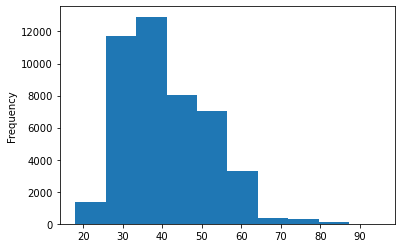

In [26]:
#Lets make a plot
inp1.age.plot.hist()
plt.show()

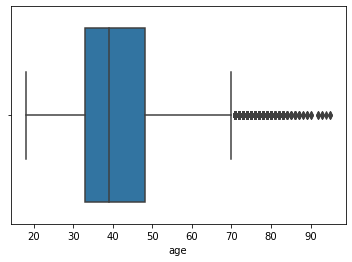

In [27]:
#Better graphics would be boxplot
sns.boxplot(inp1.age)
plt.show()

Let's look at another variable Balance

In [28]:
inp1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

So now here theres a big difference between median and mean and also 75% and max has a huge difference.

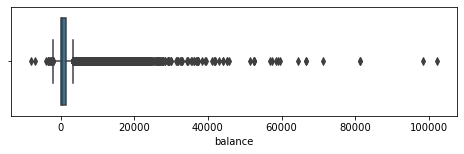

In [29]:
#lets plot the boxplot
plt.figure(figsize=(8,2))
sns.boxplot(inp1.balance)
plt.show()

Most of them are in very small range and we do see huge extremes which is expected in this column "balance".

Let's look at the percentiles.

In [30]:
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

We see that upto 95% have a balance of 5768 and 99% have 13k.

Now we can decide the outliers and decide what to do with them -> drop them or cap them.

In [31]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


So this particular group seems to be financially well off! These arent invalid records and at the moment these people are very important.

#### Either we can cap the values or keep in mind that these records are there during the analysis.
#### Instead of looking at mean, we could look at quantiles/medians/percentiles instead.

### Standardize Variable

Let's look at the duration variable for this purpose.

In [32]:
inp1.duration.head()

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [33]:
inp1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

We have values in different units.
- we need to standardise the values and extract only the numbers.

In [34]:
inp1.duration.apply(lambda x:float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]) )

0         4.350000
1         2.516667
2         1.266667
3         1.533333
4         3.300000
           ...    
45206    16.283333
45207     7.600000
45208    18.783333
45209     8.466667
45210     6.016667
Name: duration, Length: 45191, dtype: float64

In [35]:
inp1.duration=inp1.duration.apply(lambda x:float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]) )

In [36]:
inp1.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

So now we have standardised the variable.

### Univariate Analysis

Let's find out the types of the variables.

In [37]:
inp1.dtypes

age         float64
salary        int64
balance       int64
marital      object
targeted     object
default      object
housing      object
loan         object
contact      object
day           int64
month        object
duration    float64
campaign      int64
pdays       float64
previous      int64
poutcome     object
response     object
job          object
edu          object
dtype: object

Numerical we have a fair understanding, let's look at the categorical ones.

Let's look at marital

#### Univariate analysis -  Categorical Variables

Let's look at marital

In [38]:
inp1.marital.value_counts(normalize=True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

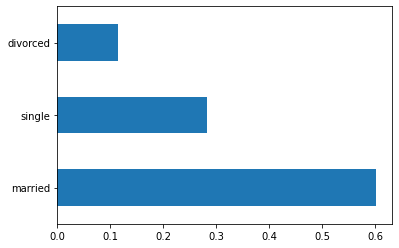

In [39]:
#Let's plot it as well!
inp1.marital.value_counts(normalize=True).plot.barh()
plt.show()

Married is by far the biggest bucket.

In [40]:
inp1.job.value_counts(normalize=True)

blue-collar      0.215242
management       0.209223
technician       0.168042
admin.           0.114403
services         0.091877
retired          0.050076
self-employed    0.034918
entrepreneur     0.032861
unemployed       0.028811
housemaid        0.027417
student          0.020756
unknown          0.006373
Name: job, dtype: float64

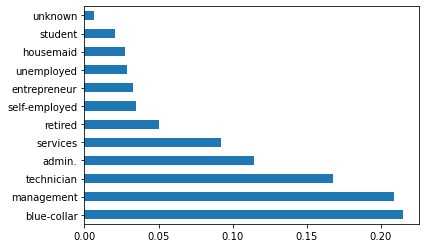

In [41]:
inp1.job.value_counts(normalize=True).plot.barh()
plt.show()

Let's look at education variable

In [42]:
inp1.edu.value_counts()

secondary    23193
tertiary     13295
primary       6846
unknown       1857
Name: edu, dtype: int64

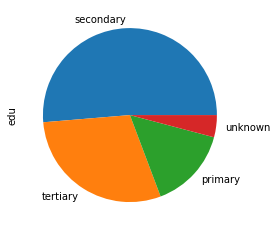

In [43]:
inp1.edu.value_counts(normalize=True).plot.pie()
plt.show()

Lets look at poutcome variable

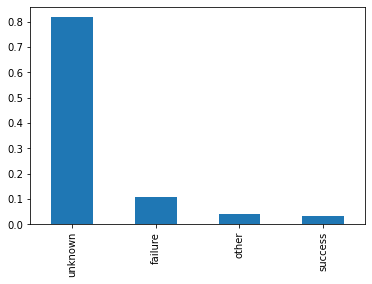

In [44]:
inp1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

For most of them it is 'unknown', which means for most of them there was no previous campaign.

We can also limit our graph without the unknowns:

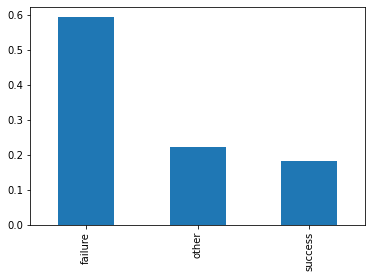

In [45]:
inp1[~(inp1["poutcome"]=="unknown")].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

Finally let's look at the target variable-"response"

In [46]:
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

For most people its a no which is what happens in these market campaigns really.

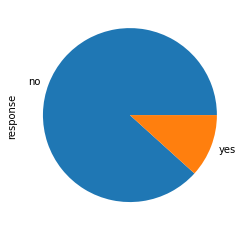

In [47]:
inp1.response.value_counts(normalize=True).plot.pie()
plt.show()

### Bi Variate Analysis and Multivariate Analysis

- We can look at associations between variables and derive patterns from them.

#### Numeric-Numeric Analysis

1. Plot types:
a) Correlation Matrix: But still it is a summary number, it is better to plot it.
b) Scatter Plot: We can plot it to display relation.
c) Pair Plot: Is like a grid with scatter plots for mutliple variables and histogram for the same variables on the diagnols usually. More benefecial for smaller number of variables.

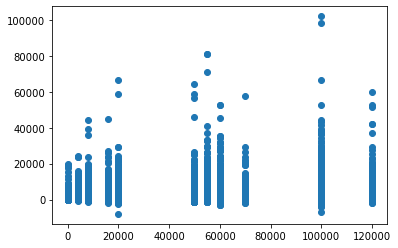

In [48]:
plt.scatter(inp1.salary,inp1.balance)
plt.show()

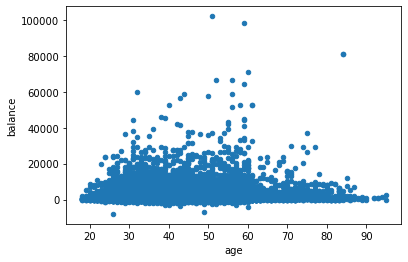

In [49]:
inp1.plot.scatter(x="age",y="balance")
plt.show()

Instead of watching them seperately we can make a pairplot!

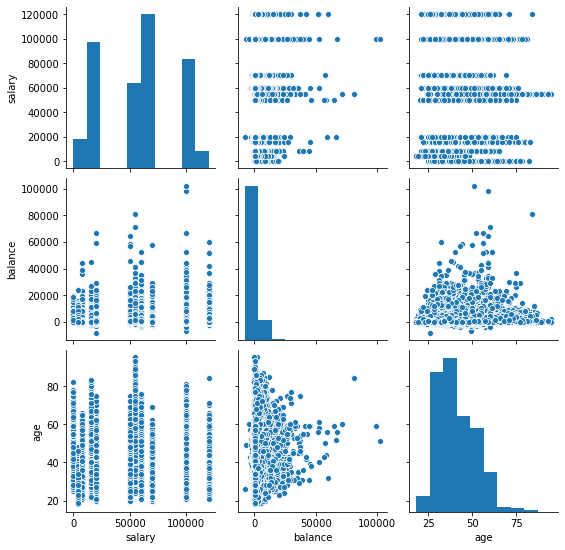

In [50]:
sns.pairplot(data=inp1,vars=["salary","balance","age"])
plt.show()

So there is basically no strong association if we see visually.

#### Quantify using corelation values

In [51]:
inp1[["age","salary","balance"]].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


#### Correlation Heatmap

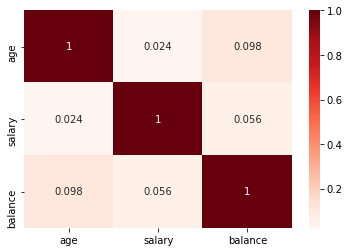

In [52]:
sns.heatmap(inp1[["age","salary","balance"]].corr(),annot=True,cmap="Reds")
plt.show()

Even from the visuals there is no such corelations as well.

### Categorical vs Numerical

#### Let's associate our response variable with other numerical variables.

In [53]:
inp1.groupby(by="response")["salary"].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [54]:
inp1.groupby(by="response")["salary"].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

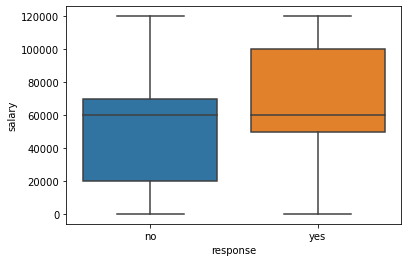

In [55]:
sns.boxplot(data=inp1,x="response",y="salary")
plt.show()

When we visualise it we can see a different picture that people who responded yes are in a higher salary cut.

#### Let's look at response vs balance

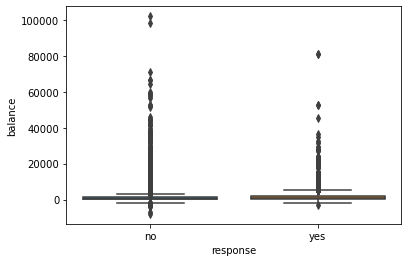

In [56]:
sns.boxplot(data=inp1,x="response",y="balance")
plt.show()

The view of the boxplot is affected due to presence of the outliers.

In [57]:
inp1.groupby(by="response")["balance"].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [58]:
inp1.groupby(by="response")["balance"].median()

response
no     417
yes    733
Name: balance, dtype: int64

Median is a more accurate metric, but lets look at the custom quantiles.

#### 75th percentile 

In [59]:
def p75(x):
    return np.quantile(x,0.75)

In [60]:
inp1.groupby(["response"])["balance"].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1304.292281,417,1345
yes,1804.681362,733,2159


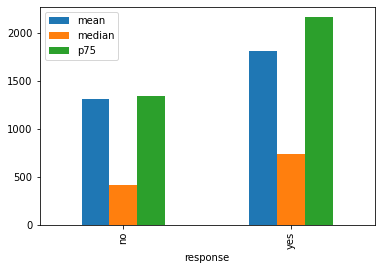

In [61]:
#going one step further
inp1.groupby(["response"])["balance"].aggregate(["mean","median",p75]).plot.bar()
plt.show()

### Categorical - Categorical 

- We know that our response variable is a binary variable.
- We want to look at response rates for different categorical variables.
- Therefore it is better to convert response as a numeric column, since it is a binary column as well.

In [62]:
inp1["response_flag"]=np.where(inp1.response=="yes",1,0)

In [63]:
inp1.response_flag.value_counts()

0    39906
1     5285
Name: response_flag, dtype: int64

In [64]:
inp1.response.value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [65]:
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [66]:
inp1.response_flag.mean()

0.11694806488017526

Now if we want to chech the response rate for any variable, we simple need to take in the average value of the inp1.response_flag.mean()

#### Education vs Response Rate

In [67]:
inp1.groupby(["edu"])["response_flag"].mean()

edu
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

As the level of education increases the response rate also increases.

Looks like the higher education people are more inclined to it.

#### Marital vs Response Rate

In [68]:
inp1.groupby(["marital"])["response_flag"].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

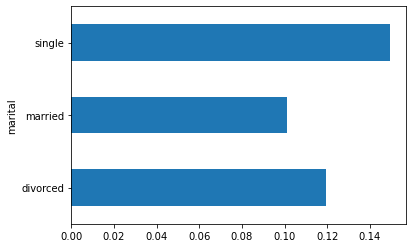

In [70]:
inp1.groupby(["marital"])["response_flag"].mean().plot.barh()
plt.show()

Single people are most inclined to making a term deposit. So we should we target them ofcourse.

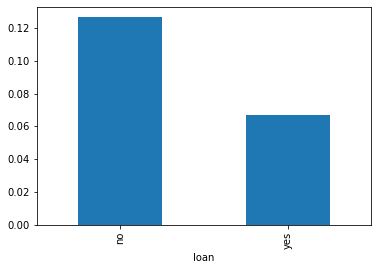

In [73]:
inp1.groupby(["loan"])["response_flag"].mean().plot.bar()
plt.show()

People who have a loan are less likely to respond to the campaign.

#### Let's check for the housing loan as well.

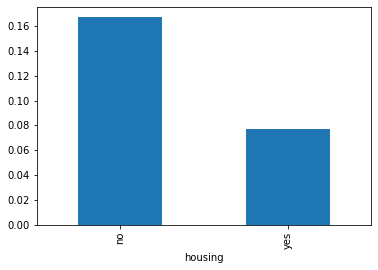

In [74]:
inp1.groupby(["housing"])["response_flag"].mean().plot.bar()
plt.show()

Just like the personal loans, the situation is same here. People with home loans are less sussceptible to opt for the campaign.

### Age vs Resonse

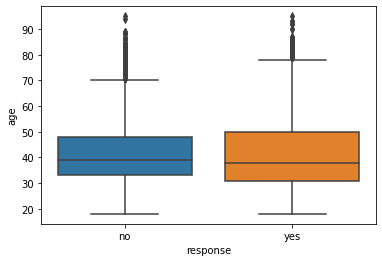

In [75]:
sns.boxplot(data=inp1,x="response",y="age")
plt.show()

Instead of looking like this let's divide the age into buckets.

### Making buckets out of the age column

In [78]:
pd.cut(inp1.age,[0,30,40,50,60,999],labels=["<30","30-40","40-50","50-60",">60"])

0        50-60
1        40-50
2        30-40
3        40-50
4        30-40
         ...  
45206    50-60
45207      >60
45208      >60
45209    50-60
45210    30-40
Name: age, Length: 45191, dtype: category
Categories (5, object): [<30 < 30-40 < 40-50 < 50-60 < >60]

In [79]:
inp1.age.head() #lets check the values just for being sure

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [80]:
#let's create a new variable
inp1["age_group"]=pd.cut(inp1.age,[0,30,40,50,60,999],labels=["<30","30-40","40-50","50-60",">60"])

In [81]:
inp1.age_group.value_counts(normalize=True)

30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
>60      0.026288
Name: age_group, dtype: float64

From this we see that most people are in the age group 30-40!!

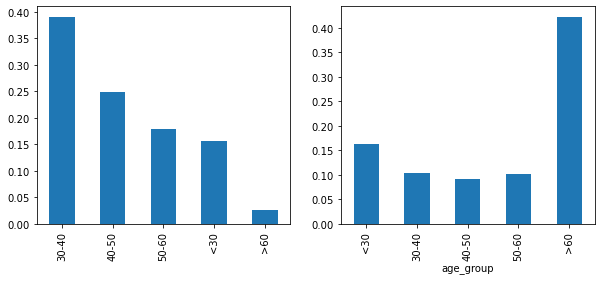

In [83]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(["age_group"])["response_flag"].mean().plot.bar()
plt.show()

Higher age groups have a huge success rate because there response rate is quite high.

### Job vs Response

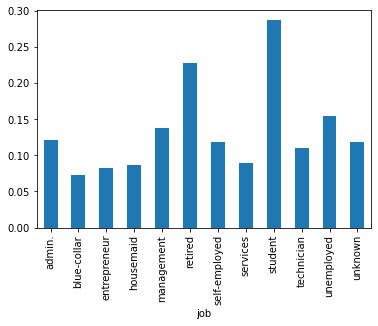

In [84]:
inp1.groupby(["job"])["response_flag"].mean().plot.bar()
plt.show()

### Multivariate Analysis

Look at combinations of variables and look at the response rates.

#### Education, Marital and Response 

In [86]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,edu,response_flag,age_group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,...,4.350000,1,NaN,0,unknown,no,management,tertiary,0,50-60
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,...,2.516667,1,NaN,0,unknown,no,technician,secondary,0,40-50
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,...,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0,30-40
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,...,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0,40-50
4,33.0,0,1,single,no,no,no,no,unknown,5,...,3.300000,1,NaN,0,unknown,no,unknown,unknown,0,30-40


In [87]:
pd.pivot_table(data=inp1,index="edu",columns="marital",values="response_flag")

marital,divorced,married,single
edu,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


Let's plot it!

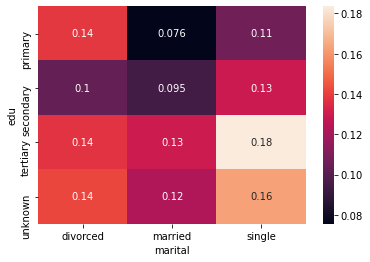

In [90]:
res=pd.pivot_table(data=inp1,index="edu",columns="marital",values="response_flag")
sns.heatmap(res,annot=True)

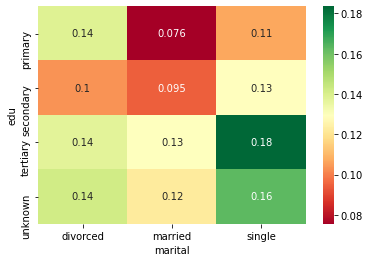

In [91]:
#Let's use a different color coding
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

So from this we can say that tertiary education equipped students are very responsive towards the campaign.

Now as we checked the average response rate is around 0.117 hence lets recentre the heatmap around it and see:

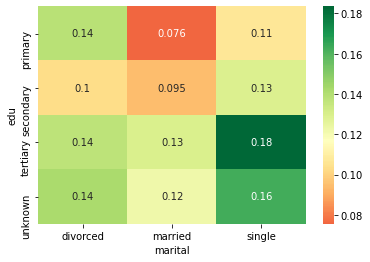

In [92]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

### Marital vs Job vs Response

In [93]:
res=pd.pivot_table(data=inp1,index="job",columns="marital",values="response_flag")
res

marital,divorced,married,single
job,,,
admin.,0.120000,0.113257,0.136074
blue-collar,0.077540,0.062742,0.105760
entrepreneur,0.083799,0.075843,0.113445
housemaid,0.097826,0.072448,0.166667
management,0.127928,0.126134,0.162254
retired,0.283019,0.220682,0.120370
self-employed,0.158273,0.079557,0.190583
services,0.091241,0.073982,0.117696
student,0.166667,0.185185,0.293850


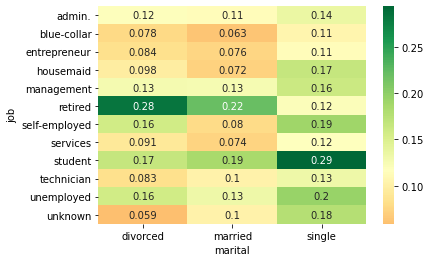

In [94]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

So retired folks in general have a high response rate. And this is a far more detailed view as the values are color-coded.

### Education vs Poutcome vs Response

In [96]:
res=pd.pivot_table(data=inp1,index="edu",columns="poutcome",values="response_flag")
res

poutcome,failure,other,success,unknown
edu,,,,
primary,0.088785,0.143443,0.609023,0.071735
secondary,0.108922,0.140831,0.640950,0.084200
tertiary,0.168456,0.220588,0.657005,0.114192
unknown,0.158192,0.200000,0.679012,0.101695


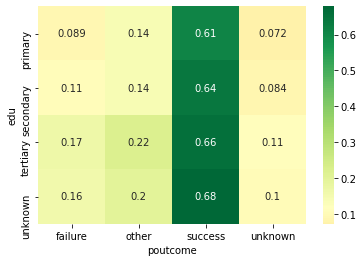

In [97]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

Notice that for these guys who have been contacted before the average value of the response is not 0.117, it's different.

In [98]:
inp1[inp1.pdays>0].response_flag.mean() #This is where the previous campaign happened!!

0.23061076102762967

So 0.2306 is our centre and we need to update it.

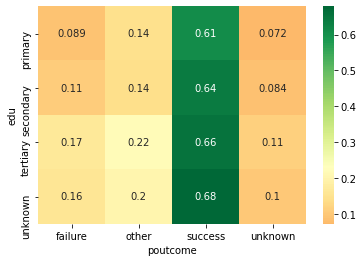

In [99]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.2306)
plt.show()

- So this means the guys who responded previously might respons to this campaign as well.
- And in each bucket education we see that primary is always lower as compared to other stages of education.

### Conclusion: 
#### These are the most optimal insights we could generate on this banking dataset using EDA.